In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/dh3553/projects/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_rich_income_30K'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = '980128a7-9cdb-486e-bf95-e2b9a391271c'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(380, 33)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:31:15.742,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.809601,1.000000,0.000000,0.810756,1.000000,0.000000,0.810450,1.000000,0.000000,0.810600
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:31:15.751,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.754145,1.000000,0.000000,0.765128,1.000000,0.000000,0.756098,1.000000,0.000000,0.760500
10,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:24:48.365,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.806947,1.000000,0.000000,0.807700,1.000000,0.000000,0.806914,1.000000,0.000000,0.807300
11,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:24:48.374,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.768467,1.000000,0.000000,0.785846,1.000000,0.000000,0.761756,1.000000,0.000000,0.773500
20,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:31:15.742,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.679204,0.633692,0.872728,0.679732,0.636042,0.866906,0.671609,0.626098,0.866201,0.675597
21,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:31:15.751,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.724319,0.673777,0.879354,0.711354,0.662588,0.870217,0.728151,0.678146,0.883165,0.719962
30,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:24:48.365,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.662291,0.614208,0.863277,0.664388,0.618503,0.857112,0.653591,0.604900,0.857075,0.658891
31,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:24:48.374,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.707663,0.659003,0.869168,0.696505,0.651606,0.861263,0.712528,0.662773,0.871614,0.704716
40,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:31:15.742,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.809820,1.000000,0.000000,0.780534,1.000000,0.000000,0.822708,1.000000,0.000000,0.804258
41,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:31:15.751,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.670396,1.000000,0.000000,0.592961,1.000000,0.000000,0.707397,1.000000,0.000000,0.661962


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
10,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:24:48.365,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.806947,1.000000,0.000000,0.807700,1.000000,0.000000,0.806914,1.000000,0.000000,0.807300
30,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:24:48.365,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.662291,0.614208,0.863277,0.664388,0.618503,0.857112,0.653591,0.604900,0.857075,0.658891
50,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:24:48.365,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.807013,1.000000,0.000000,0.777673,1.000000,0.000000,0.818869,1.000000,0.000000,0.800786
70,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:24:48.365,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.190278,0.000000,1.000000,0.201258,0.000000,1.000000,0.186081,0.000000,1.000000,0.192620
90,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:24:48.365,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.195812,0.000000,1.000000,0.185785,0.000000,1.000000,0.201186,0.000000,1.000000,0.192773
110,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:24:48.365,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.063901,0.058859,0.084973,0.063518,0.058692,0.083786,0.063326,0.058172,0.084865,0.063420
130,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:24:48.365,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.068246,0.046829,0.157765,0.069184,0.047304,0.161083,0.064083,0.044172,0.147293,0.066587
150,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:24:48.365,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.903027,0.934732,0.770502,0.901198,0.933433,0.765805,0.909660,0.939211,0.786165,0.905506
170,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:24:48.365,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.507065,0.511898,0.486867,0.545282,0.563050,0.470654,0.489600,0.488139,0.495705,0.516934
190,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-26 12:24:48.365,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.673173,0.624399,0.877046,0.675096,0.628541,0.870638,0.664477,0.615071,0.870946,0.669690


In [12]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][1].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
11,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:24:48.374,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.768467,1.000000,0.000000,0.785846,1.000000,0.000000,0.761756,1.000000,0.000000,0.773500
31,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:24:48.374,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.707663,0.659003,0.869168,0.696505,0.651606,0.861263,0.712528,0.662773,0.871614,0.704716
51,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:24:48.374,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.666558,1.000000,0.000000,0.595662,1.000000,0.000000,0.697398,1.000000,0.000000,0.657700
71,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:24:48.374,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.275935,0.000000,1.000000,0.257722,0.000000,1.000000,0.283605,0.000000,1.000000,0.274667
91,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:24:48.374,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.210675,0.000000,1.000000,0.202396,0.000000,1.000000,0.210060,0.000000,1.000000,0.205857
111,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:24:48.374,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.065873,0.061012,0.082008,0.064225,0.059539,0.081419,0.066858,0.062188,0.081789,0.065574
131,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:24:48.374,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.077511,0.056962,0.145716,0.072023,0.053012,0.141783,0.078947,0.058069,0.145705,0.075572
151,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:24:48.374,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.890306,0.920559,0.789893,0.897557,0.925531,0.794904,0.889138,0.919800,0.791097,0.893242
171,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:24:48.374,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.587452,0.627670,0.453970,0.619739,0.677175,0.408976,0.571030,0.598861,0.482046,0.594776
191,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-26 12:24:48.374,980128a7-9cdb-486e-bf95-e2b9a391271c,Exp_iter_1,...,0.718303,0.669026,0.881856,0.706867,0.661335,0.873948,0.723363,0.673065,0.884187,0.715322


In [13]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [14]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.015177,-0.032209,-0.023559,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.015401,-0.024227,-0.018449,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.015177,0.032209,0.023559,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.067084,1.068182,1.097455,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.066273,0.068343,0.098109,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.000786,0.000890,0.002649,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,0.990697,1.022229,1.020581,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,0.000191,-0.003644,-0.003600,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,0.000236,-0.002664,-0.002431,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,1.005123,0.943235,0.947793,RandomForestClassifier,Exp_iter_1,0.7,0


In [15]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.015177,-0.032209,-0.023559,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.015401,-0.024227,-0.018449,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.015177,0.032209,0.023559,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.067084,1.068182,1.097455,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.066273,0.068343,0.098109,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [16]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [17]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 864x432 with 0 Axes>

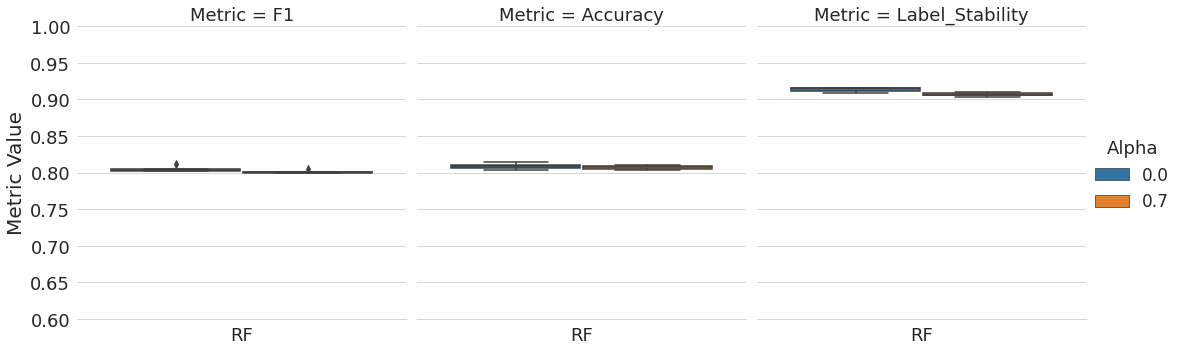

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

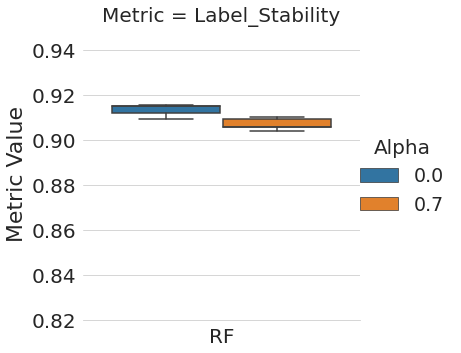

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 864x432 with 0 Axes>

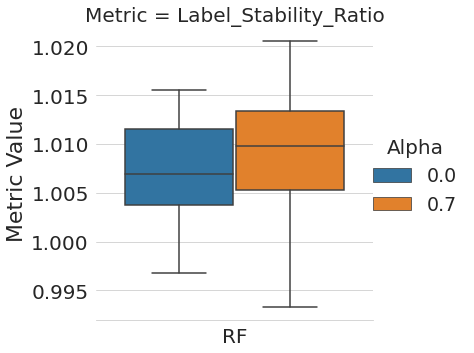

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

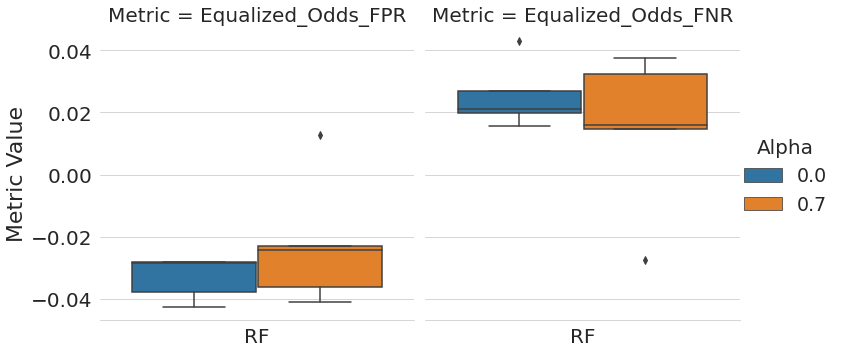

In [21]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [22]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Rich set',
    1: 'Poor set',
}

<Figure size 864x432 with 0 Axes>

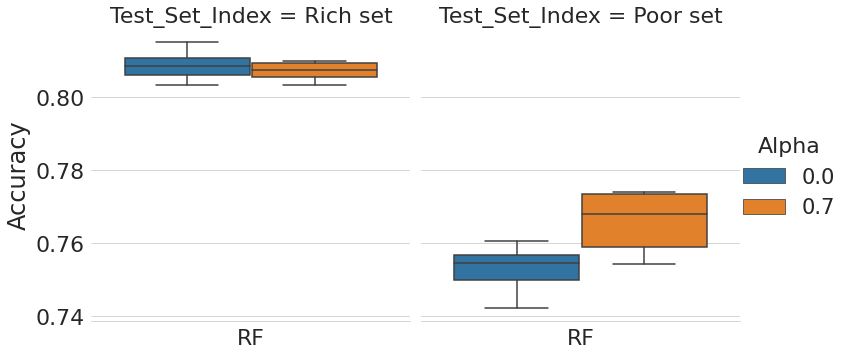

In [23]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

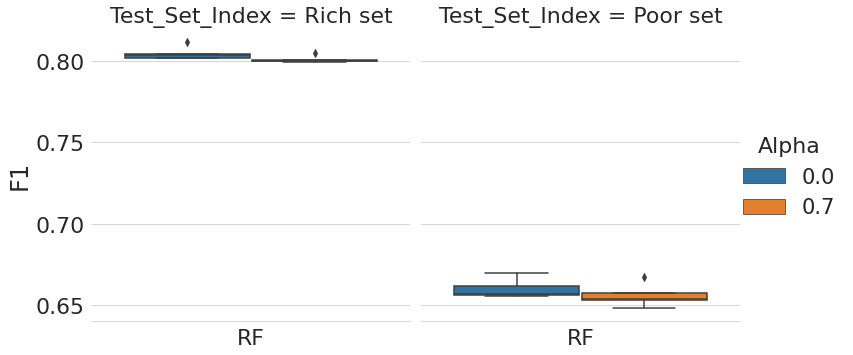

In [24]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

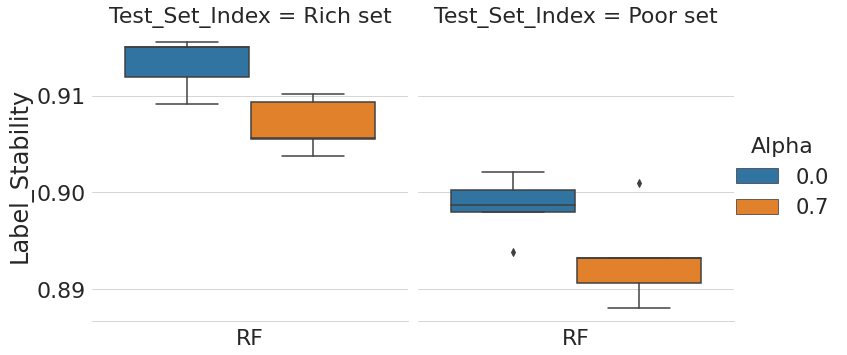

In [25]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

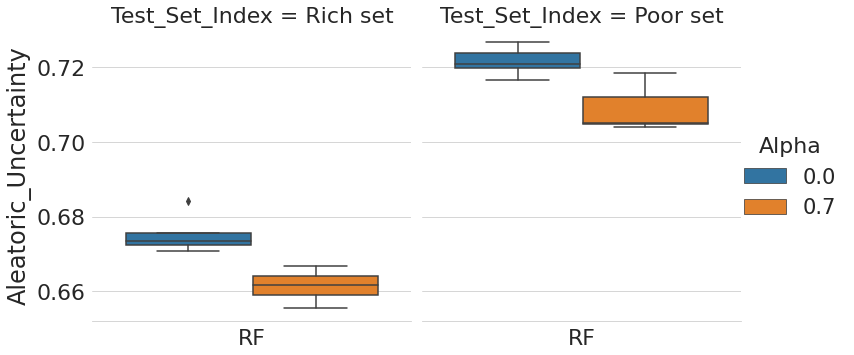

In [26]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

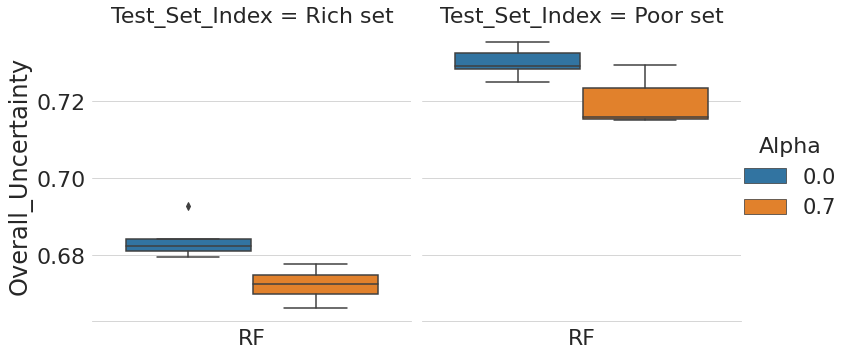

In [27]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

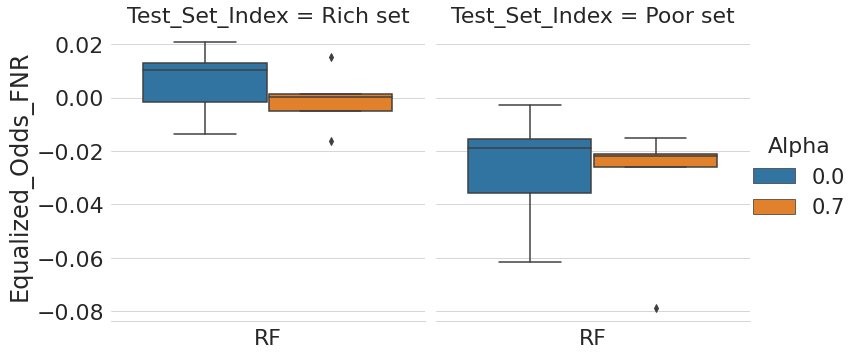

In [28]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

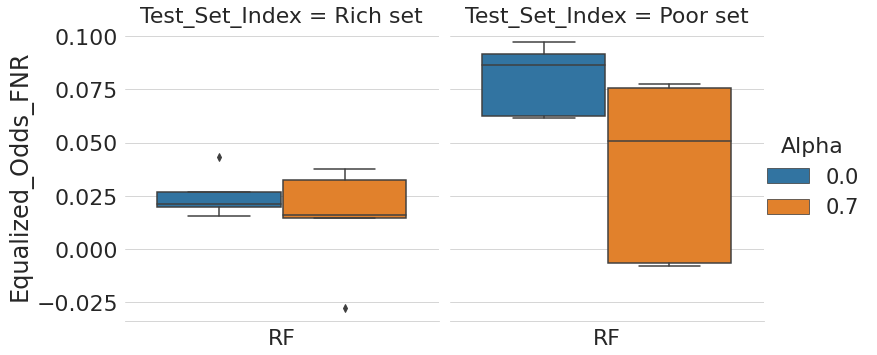

In [29]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

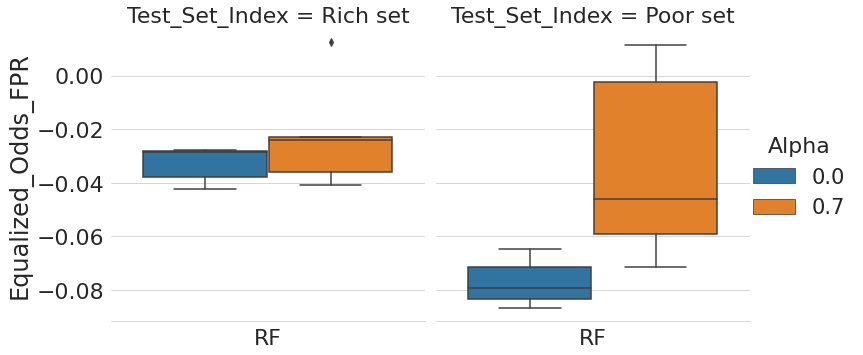

In [30]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)